In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Get all columns in a dataset
pd.set_option("display.max_columns", None)

In [ ]:
df = pd.read_csv("/content/SImplyHired_cleaned_data_new_3_20.csv")
df.head()

,company_name,title,summary,star,work_style,benefit,qualification,full description,duplicate count,city,state,min salary,max salary,experience_year,education,level,programming_language,other skill,trans star,trans min salary,trans max salary,trans experience_year,trans duplicate count,work_style_split,benefit_count,other_skill_count,programming_language_count,level_encoded,Contract,Freelance,Full-time,Internship,Part-time,Permanent,Temp-to-hire,Temporary,Associate's degree,Bachelor's degree,Doctor's degree,High school diploma or GED,Master's degree,Bash,C,C#,C++,COBOL,CSS,Crystal,Fortran,Go,HTML,Java,JavaScript,Kotlin,MATLAB,ML,PHP,Perl,Python,R,Red,Rust,SQL,Scala,Shell Script,Simula,Visual Basic
0,Subcodevs,Data Scientist,"In this role, you will collaborate with cross-...",3.7,"Full-time,Contract",NaN,"IT experience within retail, Power BI, Azure, ...",Job SummaryWe are seeking a skilled Data Scien...,1,United States,United States,26540.34,36824.28,7.5,"Master's degree,Doctor's degree",Mid-level,"Python,SQL,C,Simula","IT experience within retail, Power BI, Azure, ...",0.037240,-2.221424,-1.507342,1.861461,-0.519177,"['Full-time', 'Contract']",0,25,4,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1,Louis Vuitton,JUNIOR DATA SCIENTIST,The succesful candidate will be recognized for...,3.6,NaN,"Disability insurance, Health insurance, Dental...","Power BI, Google Cloud Platform, Mid-level, Ta...",Poste\nLouis Vuitton is seeking a dynamic and ...,1,New York,NY,100000.00,115000.00,0.0,NaN,Mid-level,"Python,Go,SQL,C","Power BI, Google Cloud Platform, Mid-level, Ta...",-0.140941,-0.583684,-0.765747,-1.112598,-0.519177,[''],7,11,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,Outlier Ai,Data Scientist - AI Trainer,About the opportunity: Outlier is looking for ...,2.4,Freelance,NaN,"Mathematics, Mid-level, Math, Bachelor's degree",Outlier helps the world’s most innovative comp...,1,Remote,Remote,38874.00,88350.00,0.0,Bachelor's degree,Mid-level,NaN,"Mathematics, Mid-level, Math, Bachelor's degree",-2.279110,-1.946452,-1.018556,-1.112598,-0.519177,['Freelance'],0,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Motus Recruiting and Staffing,Data Scientist (Remote),Assist developing reports in Workday and other...,3.0,"Full-time,Contract","Health insurance, Dental insurance, 401(k), Vi...","Power BI, Data mining, R, Mid-level, Tableau, ...","Data Scientist (Remote)Our client, a premier g...",7,Portland,OR,84816.00,84816.00,3.0,NaN,Mid-level,"Python,R,C","Power BI, Data mining, R, Mid-level, Tableau, ...",-1.210025,-0.922203,-1.052080,0.077025,3.206999,"['Full-time', 'Contract']",4,14,3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,Vanderbilt University Medical Center,Data Scientist Associate,Guides and educates data science teams to prov...,3.7,Full-time,NaN,"Research, 3 years, Master's degree, Machine le...",Discover Vanderbilt University Medical Center ...,1,Nashville,TN,125300.00,182300.00,3.0,Master's degree,Senior level,"R,C","Research, 3 years, Master's degree, Machine le...",0.037240,-0.019636,-0.127322,0.077025,-0.519177,['Full-time'],0,8,2,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# df["state"] = df["state"].str.replace(" ", "")
# df["state"].unique()

In [ ]:
# Decrease Silhouette Score

# # Get latitude, longtitude for 50 states
# state_latlong = {
#     'AL': (32.8067, -86.7911),
#     'AK': (61.3707, -152.4044),
#     'AZ': (33.7298, -111.4312),
#     'AR': (34.9697, -92.3731),
#     'CA': (36.1162, -119.6816),
#     'CO': (39.0598, -105.3111),
#     'CT': (41.5978, -72.7554),
#     'DE': (39.3185, -75.5071),
#     'FL': (27.7663, -81.6868),
#     'GA': (33.0406, -83.6431),
#     'HI': (21.0943, -157.4983),
#     'ID': (44.2405, -114.4788),
#     'IL': (40.3495, -88.9861),
#     'IN': (39.8494, -86.2583),
#     'IA': (42.0115, -93.2105),
#     'KS': (38.5266, -96.7265),
#     'KY': (37.6681, -84.6701),
#     'LA': (31.1695, -91.8678),
#     'ME': (44.6939, -69.3819),
#     'MD': (39.0639, -76.8021),
#     'MA': (42.2302, -71.5301),
#     'MI': (43.3266, -84.5361),
#     'MN': (45.6945, -93.9002),
#     'MS': (32.7416, -89.6787),
#     'MO': (38.4561, -92.2884),
#     'MT': (46.9219, -110.4544),
#     'NE': (41.1254, -98.2681),
#     'NV': (38.3135, -117.0554),
#     'NH': (43.4525, -71.5639),
#     'NJ': (40.2989, -74.5210),
#     'NM': (34.8405, -106.2485),
#     'NY': (42.1657, -74.9481),
#     'NC': (35.6301, -79.8064),
#     'ND': (47.5289, -99.7840),
#     'OH': (40.3888, -82.7649),
#     'OK': (35.5653, -96.9289),
#     'OR': (44.5720, -122.0709),
#     'PA': (40.5908, -77.2098),
#     'RI': (41.6809, -71.5118),
#     'SC': (33.8569, -80.9450),
#     'SD': (44.2998, -99.4388),
#     'TN': (35.7478, -86.6923),
#     'TX': (31.0545, -97.5635),
#     'UT': (40.1500, -111.8624),
#     'VT': (44.0459, -72.7107),
#     'VA': (37.7693, -78.1699),
#     'WA': (47.4009, -121.4905),
#     'WV': (38.4912, -80.9546),
#     'WI': (44.2685, -89.6165),
#     'WY': (42.7559, -107.3025),
#     'DC': (38.9072, -77.0369),
#     'Remote': (39.8283, -98.5795), # center of U.S.
#     'UnitedStates': (39.8283, -98.5795),
#     'Unknown': (39.8283, -98.5795) # center of U.S.
# }


# df["lat"] = df["state"].map(lambda x: state_latlong.get(x)[0])
# df["long"] = df["state"].map(lambda x: state_latlong.get(x)[1])

# # Standardization
# scaler = StandardScaler()
# df[['trans_lat', 'trans_long']] = scaler.fit_transform(df[['lat', 'long']])

In [ ]:
# Label Encoding (city, state, level)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["city"] = le.fit_transform(df["city"])
df["state"] = le.fit_transform(df["state"])

df.head()

,company_name,title,summary,star,work_style,benefit,qualification,full description,duplicate count,city,state,min salary,max salary,experience_year,education,level,programming_language,other skill,trans star,trans min salary,trans max salary,trans experience_year,trans duplicate count,work_style_split,benefit_count,other_skill_count,programming_language_count,level_encoded,Contract,Freelance,Full-time,Internship,Part-time,Permanent,Temp-to-hire,Temporary,Associate's degree,Bachelor's degree,Doctor's degree,High school diploma or GED,Master's degree,Bash,C,C#,C++,COBOL,CSS,Crystal,Fortran,Go,HTML,Java,JavaScript,Kotlin,MATLAB,ML,PHP,Perl,Python,R,Red,Rust,SQL,Scala,Shell Script,Simula,Visual Basic
0,Subcodevs,Data Scientist,"In this role, you will collaborate with cross-...",3.7,"Full-time,Contract",NaN,"IT experience within retail, Power BI, Azure, ...",Job SummaryWe are seeking a skilled Data Scien...,1,222,43,26540.34,36824.28,7.5,"Master's degree,Doctor's degree",Mid-level,"Python,SQL,C,Simula","IT experience within retail, Power BI, Azure, ...",0.037240,-2.221424,-1.507342,1.861461,-0.519177,"['Full-time', 'Contract']",0,25,4,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1,Louis Vuitton,JUNIOR DATA SCIENTIST,The succesful candidate will be recognized for...,3.6,NaN,"Disability insurance, Health insurance, Dental...","Power BI, Google Cloud Platform, Mid-level, Ta...",Poste\nLouis Vuitton is seeking a dynamic and ...,1,142,29,100000.00,115000.00,0.0,NaN,Mid-level,"Python,Go,SQL,C","Power BI, Google Cloud Platform, Mid-level, Ta...",-0.140941,-0.583684,-0.765747,-1.112598,-0.519177,[''],7,11,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,Outlier Ai,Data Scientist - AI Trainer,About the opportunity: Outlier is looking for ...,2.4,Freelance,NaN,"Mathematics, Mid-level, Math, Bachelor's degree",Outlier helps the world’s most innovative comp...,1,178,42,38874.00,88350.00,0.0,Bachelor's degree,Mid-level,NaN,"Mathematics, Mid-level, Math, Bachelor's degree",-2.279110,-1.946452,-1.018556,-1.112598,-0.519177,['Freelance'],0,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Motus Recruiting and Staffing,Data Scientist (Remote),Assist developing reports in Workday and other...,3.0,"Full-time,Contract","Health insurance, Dental insurance, 401(k), Vi...","Power BI, Data mining, R, Mid-level, Tableau, ...","Data Scientist (Remote)Our client, a premier g...",7,168,31,84816.00,84816.00,3.0,NaN,Mid-level,"Python,R,C","Power BI, Data mining, R, Mid-level, Tableau, ...",-1.210025,-0.922203,-1.052080,0.077025,3.206999,"['Full-time', 'Contract']",4,14,3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,Vanderbilt University Medical Center,Data Scientist Associate,Guides and educates data science teams to prov...,3.7,Full-time,NaN,"Research, 3 years, Master's degree, Machine le...",Discover Vanderbilt University Medical Center ...,1,139,36,125300.00,182300.00,3.0,Master's degree,Senior level,"R,C","Research, 3 years, Master's degree, Machine le...",0.037240,-0.019636,-0.127322,0.077025,-0.519177,['Full-time'],0,8,2,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Select columns for clustering
df.columns
cluster_columns = ['city', 'state',
       'trans star', 'trans min salary',
       'trans max salary', 'trans experience_year', 'trans duplicate count',
       'benefit_count', 'other_skill_count',
       'programming_language_count', 'level_encoded', 'Contract', 'Freelance',
       'Full-time', 'Internship', 'Part-time', 'Permanent', 'Temp-to-hire',
       'Temporary', "Associate's degree", "Bachelor's degree",
       "Doctor's degree", "High school diploma or GED", "Master's degree",
       'Bash', 'C', 'C#', 'C++', 'COBOL', 'CSS', 'Crystal', 'Fortran', 'Go',
       'HTML', 'Java', 'JavaScript', 'Kotlin', 'MATLAB', 'ML', 'PHP', 'Perl',
       'Python', 'R', 'Red', 'Rust', 'SQL', 'Scala', 'Shell Script', 'Simula',
       'Visual Basic']

In [ ]:
# Create a dataset for Clustering
X = df[cluster_columns]
X.head()

,city,state,trans star,trans min salary,trans max salary,trans experience_year,trans duplicate count,benefit_count,other_skill_count,programming_language_count,level_encoded,Contract,Freelance,Full-time,Internship,Part-time,Permanent,Temp-to-hire,Temporary,Associate's degree,Bachelor's degree,Doctor's degree,High school diploma or GED,Master's degree,Bash,C,C#,C++,COBOL,CSS,Crystal,Fortran,Go,HTML,Java,JavaScript,Kotlin,MATLAB,ML,PHP,Perl,Python,R,Red,Rust,SQL,Scala,Shell Script,Simula,Visual Basic
0,222,43,0.037240,-2.221424,-1.507342,1.861461,-0.519177,0,25,4,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1,142,29,-0.140941,-0.583684,-0.765747,-1.112598,-0.519177,7,11,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,178,42,-2.279110,-1.946452,-1.018556,-1.112598,-0.519177,0,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,168,31,-1.210025,-0.922203,-1.052080,0.077025,3.206999,4,14,3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,139,36,0.037240,-0.019636,-0.127322,0.077025,-0.519177,0,8,2,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Function to delete Outliers
def remove_outliers(df, col):
  Q1 = df[col].quantile(.25)
  Q3 = df[col].quantile(.75)
  IQR = Q3 - Q1

  upper = Q3 + 1.5*IQR
  lower = Q1 - 1.5*IQR

  return df[(df[col] >= lower) & (df[col] <= upper)]

In [ ]:
# Remove outliers for trans min salary, trans max salary, and trans experience_year
X = remove_outliers(X, "trans min salary")
X = remove_outliers(X, "trans max salary")
X = remove_outliers(X, "trans experience_year")

X.head()

,city,state,trans star,trans min salary,trans max salary,trans experience_year,trans duplicate count,benefit_count,other_skill_count,programming_language_count,level_encoded,Contract,Freelance,Full-time,Internship,Part-time,Permanent,Temp-to-hire,Temporary,Associate's degree,Bachelor's degree,Doctor's degree,High school diploma or GED,Master's degree,Bash,C,C#,C++,COBOL,CSS,Crystal,Fortran,Go,HTML,Java,JavaScript,Kotlin,MATLAB,ML,PHP,Perl,Python,R,Red,Rust,SQL,Scala,Shell Script,Simula,Visual Basic
1,142,29,-0.140941,-0.583684,-0.765747,-1.112598,-0.519177,7,11,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,168,31,-1.210025,-0.922203,-1.052080,0.077025,3.206999,4,14,3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,139,36,0.037240,-0.019636,-0.127322,0.077025,-0.519177,0,8,2,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,43,2,-0.140941,-0.657746,-0.422060,-1.112598,-0.519177,0,18,4,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
6,228,16,0.037240,-0.646443,-0.850933,-0.716057,3.206999,0,22,6,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0


# PCA - to find the best k

In [ ]:
from sklearn.decomposition import PCA
pca_all = PCA()
pca_all.fit(X)

features = pca_all.transform(X)

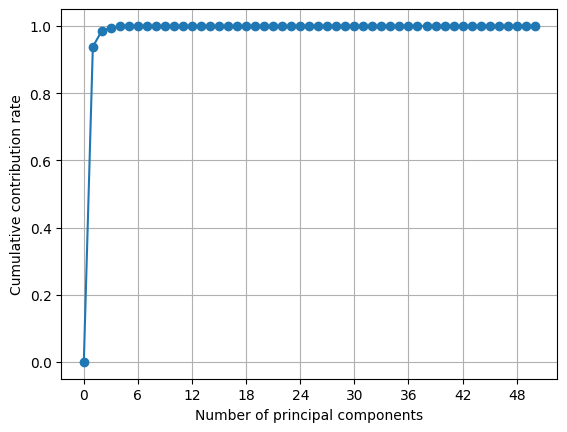

In [ ]:
# Cumulative contribution rate
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca_all.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

# PCA: the number of components = 5 is the best
# We can not visualize over 4 or higher dimentions

# Clustering 1: KMeans

## Why the model was chosen

K-means clustering is a powerful unsupervised machine learning algorithm for grouping unlabeled datasets. Its objective is to divide data into clusters, making similar data points part of the same group. So, it is easy to interpret and thus one of the famous and popular models.

## Model assumptions
- Spherical shape and isotropic

their radius is approximately equal in all directions. The cluster center is assigned to the mean that the algorithm determines from the average of the data points within a cluster

\

- Equal Variance

for every cluster, the distribution of data points around the cluster center is approximately the same.

\

- Cluster sizes

Clusters with more data points will affect the cluster mean more because the algorithm assigns each data point to the cluster with the closest mean.

\

- Anisotropicly distributed data

When data points in K-means clustering have anisotropic distribution, they indicate non-spherical, elongated clusters with differing spreads along various dimensions. As a result, K-means' spherical cluster assumption is broken, which reduces accuracy.


## Hyperparameter tuning

- Elbow Method

It finds the best number of clusters

<ipython-input-135-11a67427d9f8>:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_km = pd.concat([df_km, pd.DataFrame({"k": [k], "score": [score]})], ignore_index=True)


k=2, Silhouette Score=0.613
k=3, Silhouette Score=0.520
k=4, Silhouette Score=0.457
k=5, Silhouette Score=0.438
k=6, Silhouette Score=0.376
k=7, Silhouette Score=0.419
k=8, Silhouette Score=0.430
k=9, Silhouette Score=0.404
k=10, Silhouette Score=0.382
k=11, Silhouette Score=0.381
k=12, Silhouette Score=0.401
k=13, Silhouette Score=0.399
k=14, Silhouette Score=0.395
k=15, Silhouette Score=0.399
k=16, Silhouette Score=0.390
k=17, Silhouette Score=0.392
k=18, Silhouette Score=0.381
k=19, Silhouette Score=0.374
k=20, Silhouette Score=0.372
k=21, Silhouette Score=0.357
k=22, Silhouette Score=0.363
k=23, Silhouette Score=0.349
k=24, Silhouette Score=0.346
k=25, Silhouette Score=0.338
k=26, Silhouette Score=0.337
k=27, Silhouette Score=0.334
k=28, Silhouette Score=0.339
k=29, Silhouette Score=0.341
k=30, Silhouette Score=0.340
k=31, Silhouette Score=0.339
k=32, Silhouette Score=0.341
k=33, Silhouette Score=0.336
k=34, Silhouette Score=0.335
k=35, Silhouette Score=0.337
k=36, Silhouette Score

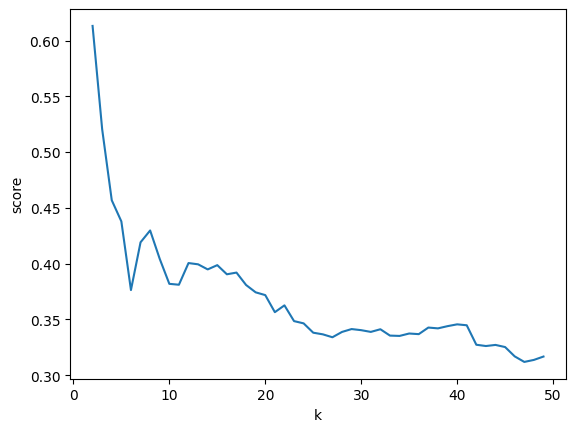

In [ ]:
# Find the best clusters
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

df_km = pd.DataFrame(columns=["k", "score"])

for k in range(2, len(X.columns)):
    km = KMeans(n_clusters=k, random_state=1)
    preds = km.fit_predict(X)
    score = silhouette_score(X, preds)
    df_km = pd.concat([df_km, pd.DataFrame({"k": [k], "score": [score]})], ignore_index=True)
    print(f"k={k}, Silhouette Score={score:.3f}")

sns.lineplot(x="k", y="score", data=df_km)
plt.show()

# KMeans (k=2) has the highest Silhouette Score=0.613

In [ ]:
# Apply KMeans (k=2)
k=2
kmeans = KMeans(n_clusters=k, random_state=1)
clusters_k = kmeans.fit_predict(X)

X_k = X.copy()
X_k["cluster"] = clusters_k

In [ ]:
X_k.groupby("cluster").mean()

,city,state,trans star,trans min salary,trans max salary,trans experience_year,trans duplicate count,benefit_count,other_skill_count,programming_language_count,level_encoded,Contract,Freelance,Full-time,Internship,Part-time,Permanent,Temp-to-hire,Temporary,Associate's degree,Bachelor's degree,Doctor's degree,High school diploma or GED,Master's degree,Bash,C,C#,C++,COBOL,CSS,Crystal,Fortran,Go,HTML,Java,JavaScript,Kotlin,MATLAB,ML,PHP,Perl,Python,R,Red,Rust,SQL,Scala,Shell Script,Simula,Visual Basic
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,179.002564,25.712821,0.006629,-0.007693,-0.099415,0.120408,0.036565,4.141026,16.376923,3.182051,1.633333,0.061538,0.0,0.700000,0.0,0.005128,0.002564,0.00000,0.002564,0.012821,0.525641,0.294872,0.041026,0.535897,0.010256,0.774359,0.038462,0.066667,0.000000,0.007692,0.002564,0.002564,0.146154,0.005128,0.082051,0.017949,0.002564,0.058974,0.053846,0.002564,0.025641,0.728205,0.535897,0.017949,0.0,0.523077,0.058974,0.020513,0.0,0.000000
1,49.574074,20.810185,0.078485,-0.203645,-0.247109,-0.086364,0.006973,3.629630,16.962963,3.166667,1.550926,0.050926,0.0,0.736111,0.0,0.009259,0.004630,0.00463,0.009259,0.037037,0.523148,0.240741,0.046296,0.495370,0.018519,0.750000,0.004630,0.046296,0.009259,0.004630,0.000000,0.004630,0.125000,0.004630,0.101852,0.037037,0.000000,0.060185,0.032407,0.004630,0.013889,0.745370,0.611111,0.013889,0.0,0.523148,0.023148,0.023148,0.0,0.009259


## The meaning of each cluster

### cluster 0: Mid to Senior level job

### cluster 1: Entry level job


- The trans min salary for cluster 0 is much higher than cluster 1, and the trans max salary for cluster 0 is also higher than cluster 1. So, jobs for cluster 0 provide more money.

- The trans experience year for cluster 0 is higher than cluster 1, indicating requiring mid or higher experience.

# Clustering 2: Hierarchical Clustering

## Why the model was chosen

Hierarchical clustering is a powerful unsupervised learning technique that organizes data into a tree-like structure allowing us to visualize relationships between data points using a dendrogram. It is also really popluar and widely used model, as it does not require specifying the number of clusters in advance, unlike KMeans.We can decide it visually from dendrogram. This flexibility makes it a great alternative options to KMeans.


## Model assumptions

- No Assumption of Normality

Hierarchical clustering, particularly Ward's method, does not assume that the data is normally distributed.

- Data scaling

Variables should be scaling, using like Standardrization, as the distance-based methods are sensitive to the magnitude of values.


## Hyperparameter tuning

- Linkage method

We need to determines how distances between clusters are calculated. (Ward's method, Complete linkage, etc)

- Distance metric

We can choose how distances are computed between data points (Euclidean, Manhattan, and cosine, etc)

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score
import numpy as np

# Linkage
methods = ['ward', 'single', 'complete']

best_score = -np.inf
best_params = {}
best_labels = None


# Calculate Silhouette Score for each likage method
for method in methods:
    Z = linkage(X, method=method)
    for k in range(2, 30):
        # Clustering using k
        labels = fcluster(Z, k, criterion='maxclust')

        # Silhouette score
        score = silhouette_score(X, labels)

        # update best score
        if score > best_score:
            best_score = score
            best_params = {'method': method, 'k': k}
            best_labels = labels

# output result
print(f"Best Silhouette Score: {best_score:.2f}")
print(f"Best Params: {best_params}")

X_h_best = X.copy()
X_h_best['cluster'] = best_labels
X_h_best.groupby('cluster').mean()

Best Silhouette Score: 0.61
Best Params: {'method': 'complete', 'k': 2}


,city,state,trans star,trans min salary,trans max salary,trans experience_year,trans duplicate count,benefit_count,other_skill_count,programming_language_count,level_encoded,Contract,Freelance,Full-time,Internship,Part-time,Permanent,Temp-to-hire,Temporary,Associate's degree,Bachelor's degree,Doctor's degree,High school diploma or GED,Master's degree,Bash,C,C#,C++,COBOL,CSS,Crystal,Fortran,Go,HTML,Java,JavaScript,Kotlin,MATLAB,ML,PHP,Perl,Python,R,Red,Rust,SQL,Scala,Shell Script,Simula,Visual Basic
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,51.753363,21.206278,0.079587,-0.208667,-0.253260,-0.084792,0.004381,3.556054,16.798206,3.125561,1.538117,0.053812,0.0,0.726457,0.0,0.008969,0.004484,0.004484,0.008969,0.035874,0.515695,0.242152,0.044843,0.488789,0.017937,0.739910,0.004484,0.044843,0.008969,0.004484,0.000000,0.004484,0.121076,0.004484,0.098655,0.035874,0.000000,0.058296,0.03139,0.004484,0.013453,0.744395,0.605381,0.013453,0.0,0.515695,0.022422,0.022422,0.0,0.008969
2,180.099217,25.571802,0.004674,-0.001188,-0.093135,0.123271,0.038614,4.193211,16.462141,3.206266,1.642298,0.060052,0.0,0.704961,0.0,0.005222,0.002611,0.000000,0.002611,0.013055,0.530026,0.295039,0.041775,0.540470,0.010444,0.780679,0.039164,0.067885,0.000000,0.007833,0.002611,0.002611,0.148825,0.005222,0.083551,0.018277,0.002611,0.060052,0.05483,0.002611,0.026110,0.728460,0.537859,0.018277,0.0,0.527415,0.060052,0.020888,0.0,0.000000


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, "complete")
Z

array([[   2.        ,    8.        ,    0.        ,    2.        ],
       [ 578.        ,  579.        ,    0.        ,    2.        ],
       [ 282.        ,  342.        ,    0.        ,    2.        ],
       ...,
       [1204.        , 1207.        ,  126.33809729,  223.        ],
       [1205.        , 1206.        ,  127.49536417,  383.        ],
       [1208.        , 1209.        ,  239.19910081,  606.        ]])

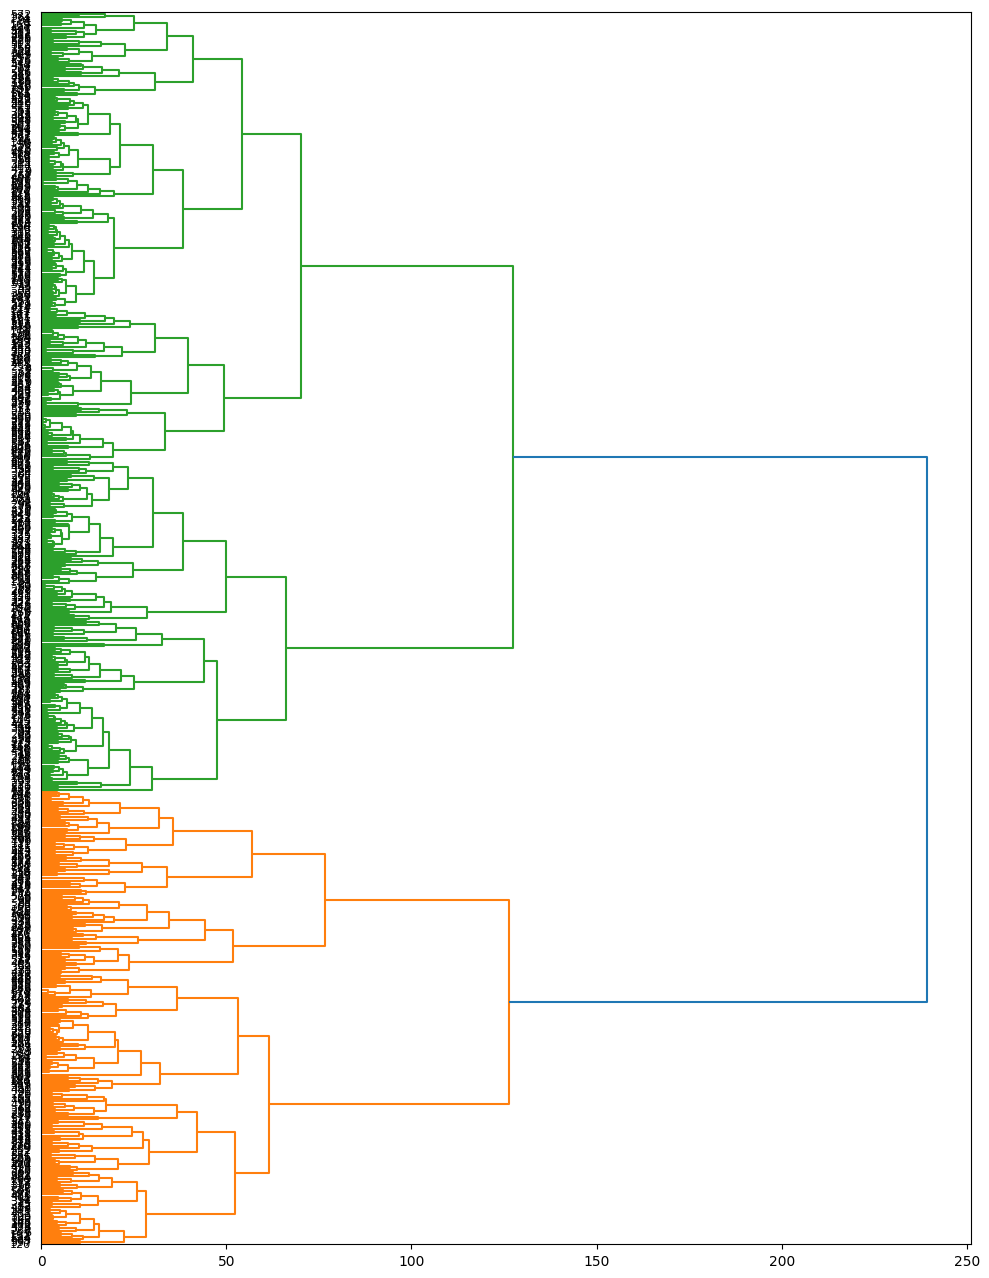

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(12, 16))
dendrogram(Z, orientation='right', leaf_font_size=8)
plt.show()

In [ ]:
# Find the best k
# import numpy as np
# from scipy.cluster.hierarchy import fcluster

# best_score = -np.inf
# best_k = 1
# scores = []

# for k in range(2, 30):
#     labels = fcluster(Z, k, criterion='maxclust')
#     score = silhouette_score(X, labels)
#     scores.append(score)
#     if score > best_score:
#         best_score = score
#         best_k = k

# plt.plot(range(2, 30), scores, marker='o')
# plt.xlabel("Number of clusters")
# plt.ylabel("Silhouette Score")
# plt.show()

# print(f"Best score: {best_score:.3f} (k = {best_k})")

In [ ]:
# k = 2
from scipy.cluster.hierarchy import fcluster
labels_2 = fcluster(Z, 2, criterion='maxclust')
X_h = X.copy()
X_h['cluster_hier'] = labels_2

X_h.groupby("cluster_hier").mean()

,city,state,trans star,trans min salary,trans max salary,trans experience_year,trans duplicate count,benefit_count,other_skill_count,programming_language_count,level_encoded,Contract,Freelance,Full-time,Internship,Part-time,Permanent,Temp-to-hire,Temporary,Associate's degree,Bachelor's degree,Doctor's degree,High school diploma or GED,Master's degree,Bash,C,C#,C++,COBOL,CSS,Crystal,Fortran,Go,HTML,Java,JavaScript,Kotlin,MATLAB,ML,PHP,Perl,Python,R,Red,Rust,SQL,Scala,Shell Script,Simula,Visual Basic
cluster_hier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,51.753363,21.206278,0.079587,-0.208667,-0.253260,-0.084792,0.004381,3.556054,16.798206,3.125561,1.538117,0.053812,0.0,0.726457,0.0,0.008969,0.004484,0.004484,0.008969,0.035874,0.515695,0.242152,0.044843,0.488789,0.017937,0.739910,0.004484,0.044843,0.008969,0.004484,0.000000,0.004484,0.121076,0.004484,0.098655,0.035874,0.000000,0.058296,0.03139,0.004484,0.013453,0.744395,0.605381,0.013453,0.0,0.515695,0.022422,0.022422,0.0,0.008969
2,180.099217,25.571802,0.004674,-0.001188,-0.093135,0.123271,0.038614,4.193211,16.462141,3.206266,1.642298,0.060052,0.0,0.704961,0.0,0.005222,0.002611,0.000000,0.002611,0.013055,0.530026,0.295039,0.041775,0.540470,0.010444,0.780679,0.039164,0.067885,0.000000,0.007833,0.002611,0.002611,0.148825,0.005222,0.083551,0.018277,0.002611,0.060052,0.05483,0.002611,0.026110,0.728460,0.537859,0.018277,0.0,0.527415,0.060052,0.020888,0.0,0.000000


## The meaning of each cluster (k=2)

### cluster 1: lower-paying & less experience required

### cluster 2: higher-paying & more experience and higher education


# Clustering 3: DBSCAN

## Why the model was chosen

DBSCAN(Density-Based Spatial Clustering of Applications with Noise) and K-Means are both clustering algorithms that group together data that have the same characteristic. However, They work on different principles and are suitable for different types of data. We prefer to use DBSCAN when the data is not spherical in shape or the number of classes is not known beforehand. As it can identify clusters of arbitrary shapes and effectively handle noise. K-Means, on the other hand, is better suited for data with well-defined, spherical clusters and is less effective with noise or complex cluster structures. So, choosing this model makes us understand their difference.


## Model assumptions

- Arbitrary-Shaped Clusters

Clusters can take any shape, not just circular or convex.

- Noise and Outliers

It effectively identifies and handles noise points without assigning them to any cluster.

- No need to specify the number of clusters

DBSCAN automatically finds the number of clusters based on density parameters.


## Hyperparameter tuning

- eps

 Eps defines the radius of the neighborhood around a data point. If eps is too small, most points will be classified as noise. If eps is too large, clusters may merge, and the algorithm may fail to distinguish between them.


- min samples

This is the minimum number of points required within the eps radius to form a dense region.

In [ ]:
# Find the best eps and min_samples
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

best_score = -np.inf
best_params = {}
for eps in np.linspace(1, 20, 50):
    for min_samples in range(2, 6):
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X)

        # Only one cluster or onely noise
        if len(set(labels)) <= 1 or -1 in set(labels) and len(set(labels)) == 2:
            continue

        score = silhouette_score(X, labels)
        if score > best_score:
            best_score = score
            best_params = {'eps': eps, 'min_samples': min_samples}

print(f"Best Silhouette Score: {best_score:.2f}")
print(f"Best eps: {best_params['eps']:.2f}")
print(f"Best min_samples: {best_params['min_samples']}")

Best Silhouette Score: 0.42
Best eps: 13.80
Best min_samples: 4


In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=13.8, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=13.8, min_samples=4)

In [ ]:
labels = dbscan.labels_
X_d = X.copy()
X_d["cluster_dbscan"] = labels

X_d.groupby("cluster_dbscan").mean()

,city,state,trans star,trans min salary,trans max salary,trans experience_year,trans duplicate count,benefit_count,other_skill_count,programming_language_count,level_encoded,Contract,Freelance,Full-time,Internship,Part-time,Permanent,Temp-to-hire,Temporary,Associate's degree,Bachelor's degree,Doctor's degree,High school diploma or GED,Master's degree,Bash,C,C#,C++,COBOL,CSS,Crystal,Fortran,Go,HTML,Java,JavaScript,Kotlin,MATLAB,ML,PHP,Perl,Python,R,Red,Rust,SQL,Scala,Shell Script,Simula,Visual Basic
cluster_dbscan,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,127.100000,13.300000,0.251056,-0.255919,-0.351431,-0.041937,-0.084456,6.500000,27.800000,4.500000,1.900000,0.000000,0.0,0.800000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.200000,0.200000,0.400000,0.100000,0.900000,0.000000,0.100000,0.000000,0.100000,0.000000,0.000000,0.300000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.100000,0.100000,0.800000,0.900000,0.000000,0.0,0.700000,0.100000,0.100000,0.0,0.000000
0,143.996491,28.294737,0.015358,-0.065706,-0.161829,0.057082,0.095315,3.866667,16.929825,3.203509,1.614035,0.070175,0.0,0.750877,0.0,0.007018,0.000000,0.000000,0.010526,0.007018,0.522807,0.287719,0.049123,0.543860,0.003509,0.800000,0.042105,0.059649,0.000000,0.007018,0.003509,0.000000,0.157895,0.003509,0.115789,0.031579,0.003509,0.035088,0.066667,0.000000,0.010526,0.729825,0.547368,0.007018,0.0,0.484211,0.077193,0.014035,0.0,0.003509
1,31.894737,22.111842,0.026689,-0.151928,-0.216826,-0.097766,0.028309,3.348684,16.236842,3.111842,1.546053,0.059211,0.0,0.703947,0.0,0.006579,0.006579,0.006579,0.000000,0.052632,0.500000,0.223684,0.052632,0.447368,0.026316,0.710526,0.006579,0.039474,0.013158,0.006579,0.000000,0.006579,0.125000,0.006579,0.085526,0.039474,0.000000,0.065789,0.026316,0.006579,0.019737,0.723684,0.585526,0.019737,0.0,0.546053,0.019737,0.026316,0.0,0.006579
2,209.817610,18.647799,0.054049,-0.016411,-0.060090,0.171796,-0.093440,4.547170,15.597484,3.106918,1.622642,0.037736,0.0,0.647799,0.0,0.006289,0.006289,0.000000,0.000000,0.018868,0.553459,0.308176,0.012579,0.559748,0.012579,0.748428,0.018868,0.075472,0.000000,0.000000,0.000000,0.006289,0.106918,0.006289,0.044025,0.000000,0.000000,0.094340,0.031447,0.000000,0.037736,0.748428,0.547170,0.031447,0.0,0.559748,0.012579,0.025157,0.0,0.000000


## The meaning of each cluster

### cluster -1 : noise

### cluster 0: Junior or General Data Scientists

### cluster 1: Mid-Level Data Scientists

### cluster 2: Senior Data Scientists or Specialized Roles


# Evaluation for three clustering

In [152]:
# 1, KMeans
kmeans_pred = kmeans.fit_predict(X)

# Silhouette
from sklearn.metrics import silhouette_score
kmeans_silhouette = silhouette_score(X, kmeans_pred)
# Davies-Bouldin Index
from sklearn.metrics import davies_bouldin_score
kmeans_dbi = davies_bouldin_score(X, kmeans_pred)

print(kmeans_silhouette, kmeans_dbi)

0.6131085552018671 0.5292349087731405


In [153]:
# 2, Hierarchical Clustering

# k=2
# Silhouette
hc_silhouette_2 = silhouette_score(X, labels_2)
# Davies-Bouldin Index
hc_dbi_2 = davies_bouldin_score(X, labels_2)

# # k=3
# # Silhouette
# hc_silhouette_3 = silhouette_score(X, labels_3)
# # Davies-Bouldin Index
# hc_dbi_3 = davies_bouldin_score(X, labels_3)

print(hc_silhouette_2, hc_dbi_2)

0.6071706041119982 0.5404759516801522


In [154]:
# 3, DBSCAN
dbscan_pred = dbscan.fit_predict(X)

# Silhouette
dbscan_silhouette = silhouette_score(X, dbscan_pred)
# Davies-Bouldin Index
dbscan_dbi = davies_bouldin_score(X, dbscan_pred)

print(dbscan_silhouette, dbscan_dbi)

0.4221839333457343 2.765308292161989


<ipython-input-150-28a8a3b6ca07>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=10)
<ipython-input-150-28a8a3b6ca07>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=10)


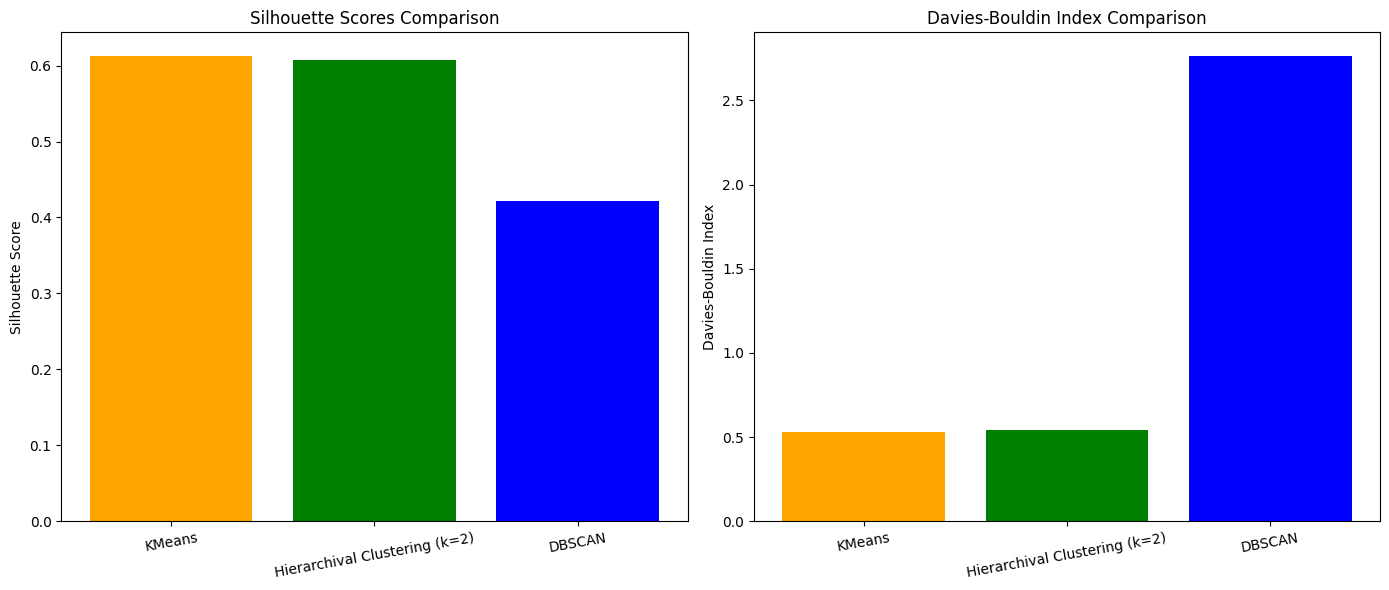

In [ ]:
# Visualize results
models = ["KMeans", "Hierarchival Clustering (k=2)", "DBSCAN"]

silhouette_results = [kmeans_silhouette, hc_silhouette_2, dbscan_silhouette]
dbi_results = [kmeans_dbi, hc_dbi_2, dbscan_dbi]

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for silhouette
ax[0].bar(models, silhouette_results, color=["orange", "green", "blue"])
ax[0].set_title('Silhouette Scores Comparison')
ax[0].set_ylabel('Silhouette Score')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=10)

# Bar plot for Davies-Bouldin Index
ax[1].bar(models, dbi_results, color=["orange", "green", "blue"])
ax[1].set_title('Davies-Bouldin Index Comparison')
ax[1].set_ylabel('Davies-Bouldin Index')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=10)

plt.tight_layout()
plt.show()

# Comparison

I implemented 4 models; KMeans, Hierarchival Clustering for different k, and DBSCAN. To evaluate these models, I used Silhouette score and Davies-Bouldin Index.

Silhouette Score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters. The score lies between -1 and 1. If silhouette score is close to 1, sample is well-clustered and already assigned to a very appropriate cluster. If the score is about to 0, sample could be assign to another cluster to it and the sample lies equally far away from both the clusters. If the score is close to -1, sample is misclassified and is merely placed somewhere in between the clusters.

Davies-Bouldin Index is a validation metric that is used to evaluate clustering models. It is calculated as the average similarity measure of each cluster with the cluster most similar to it. A lower DB index value (closer to 0) is desirable. It indicates that the clusters are well-separated and compact, which is often a good indication of a successful clustering solution.

I created two types of bar graphs for four models (Silhouette Scores and Davies-Bouldin Index) to compare the evaluations.

From the graphes, we can know below:

For Silhouette Scores, KMenas got around 0.613, Hierarchival Clusterings got approximately 0.607, and DBSCAN got about 0.4. So, we can say that K-Means has the highest score in all models.

As for Davies-Bouldin Index, KMeans got around 0.529, Hierarchival Clusterings got approximately 0.54, and DBSCAN got about 2.76.

Therefore, base on the evaluation metrics, we can conclude that KMeans (k=2) is the best clustering model. So, we should select KMenas model for this clustering analysis.